In [1]:
#warnings :)
import warnings
warnings.filterwarnings('ignore')

# Data Facts and Import

In [2]:
#Data Credit - https://www.kaggle.com/anu0012/hotel-review/data

In [3]:
# Load data
import pandas as pd
review_data = pd.read_csv('train.csv')

# Display basic information
review_data.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


# Data Cleaning / EDA

In [4]:
review_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38932 entries, 0 to 38931
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User_ID       38932 non-null  object
 1   Description   38932 non-null  object
 2   Browser_Used  38932 non-null  object
 3   Device_Used   38932 non-null  object
 4   Is_Response   38932 non-null  object
dtypes: object(5)
memory usage: 1.5+ MB


Percentage for each response type:
 Is_Response
happy        68.12
not happy    31.88
Name: proportion, dtype: float64


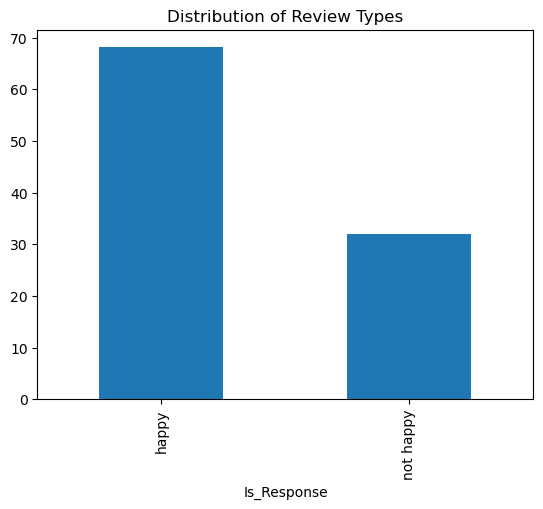

In [5]:
#Visualize distribution of responses
import matplotlib.pyplot as plt
%matplotlib inline
response_distribution = round(review_data.Is_Response.value_counts(normalize=True) * 100, 2)
print('Percentage for each response type:\n', response_distribution)

response_distribution.plot(kind='bar')
plt.title('Distribution of Review Types')
plt.show()

In [6]:
#Removing columns
review_data.drop(columns = ['User_ID', 'Browser_Used', 'Device_Used'], inplace = True)

In [7]:
review_data.head()

,Description,Is_Response
0,The room was kind of clean but had a VERY stro...,not happy
1,I stayed at the Crown Plaza April -- - April -...,not happy
2,I booked this hotel through Hotwire at the low...,not happy
3,Stayed here with husband and sons on the way t...,happy
4,My girlfriends and I stayed here to celebrate ...,not happy


In [8]:
# Apply cleaning
import re
import string

# Text cleaning functions
def clean_text(text):
    text = text.lower()  #Convert all characters to lowercase
    text = re.sub('\[.*?\]', '', text) # Remove any content within square brackets
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) # Remove all punctuation
    text = re.sub('\w*\d\w*', '', text)         # Remove words containing numbers
    text = re.sub('[''""…]', '', text)       # Remove specific quote characters
    text = re.sub('\n', '', text)          # Remove newline characters
    return text

In [9]:
# Let's take a look at the updated text
review_data['cleaned_description'] = review_data.Description.apply(clean_text)
review_data.head()

,Description,Is_Response,cleaned_description
0,The room was kind of clean but had a VERY stro...,not happy,the room was kind of clean but had a very stro...
1,I stayed at the Crown Plaza April -- - April -...,not happy,i stayed at the crown plaza april april th...
2,I booked this hotel through Hotwire at the low...,not happy,i booked this hotel through hotwire at the low...
3,Stayed here with husband and sons on the way t...,happy,stayed here with husband and sons on the way t...
4,My girlfriends and I stayed here to celebrate ...,not happy,my girlfriends and i stayed here to celebrate ...


In [10]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X = review_data.cleaned_description
y = review_data.Is_Response

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=225)

print('Training set size:', len(X_train))
print('Testing set size:', len(X_test))
print('Total samples:', len(X_train) + len(X_test))

Training set size: 35038
Testing set size: 3894
Total samples: 38932


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Create a pipeline for text vectorization and classification
text_clf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression(solver="lbfgs"))
])

# Fit the pipeline on the training data
text_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = text_clf.predict(X_test)

# Evaluate the model (you can add more evaluation metrics here)
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8823831535695943

Classification Report:
               precision    recall  f1-score   support

       happy       0.89      0.94      0.91      2571
   not happy       0.87      0.77      0.82      1323

    accuracy                           0.88      3894
   macro avg       0.88      0.86      0.86      3894
weighted avg       0.88      0.88      0.88      3894



In [13]:
#Trying on new reviews
example = ["I'm unhappy"]
result = text_clf.predict(example)

print(result)

['not happy']
